# Anticipation Aérienne : Analyse et Prédiction des Flux de Passagers Internationaux à l'Aide de ARIMA, ANN et LSTM

### Projet réalisé par:
    -TCHORBO Douae
    -ELACROUCH Imane
    -EL BOUMYAOUI Manal

# <span style="color:blue">Plan du Projet</span>

1. **Description du Problème**
2. **Test Harness**
   - Validation Dataset.
   - Évaluation du modèle
3. **Data Analysis**
   - Analyse exploratoire des données pour comprendre la structure et les caractéristiques des données.
   - Visualisation des tendances, saisons et modèles.
4. **ARIMA Models**
5. **ANN**
6. **LSTM**

**<span style="color:red">I - Description du Problème</span>**

<div style="border:1px solid blue; padding: 10px">
    <b>Le problème que nous allons examiner dans ce projet est la prédiction du nombre de passagers internationaux d'une compagnie aérienne.</b>
    <br>
    <b>
    Il s'agit d'un problème où, étant donné une année et un mois, la tâche consiste à prédire le nombre de passagers internationaux d'une compagnie aérienne en unités de 1 000. Les données s'étendent de janvier 1949 à décembre 1960, soit 12 ans, avec 144 observations.</b>
</div>

**<span style="color:red">II - Test de Harness</span>**

**<span style="color:green; margin-left: 20px;">II - 1- Validation Dataset</span>**

In [1]:
#Imbortation des bibliothèques necessaires
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as dates
from datetime import datetime
from math import sqrt
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose 

In [2]:
# prepare data
series =pd.read_csv('AirPassengers.csv', header=0, index_col=0, parse_dates=True)
series = series.squeeze()
print(series.head())

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: #Passengers, dtype: int64


In [3]:
# Supprimer toutes les valeurs manquantes de la série
series = series.dropna() 
# Afficher le type de la série
print("Type de la série :", type(series))
# Afficher la taille de la série après suppression des valeurs manquantes
print("Taille de la série  :", len(series))

Type de la série : <class 'pandas.core.series.Series'>
Taille de la série  : 144


In [4]:
# Extraire les valeurs de la série et les convertir en type 'float32'
X = series.values
X = X.astype('float32')
# Déterminer la taille de l'ensemble d'entraînement (50% des données)
train_size = int(len(X) * 0.50)
# Diviser les données en ensembles d'entraînement et de test
train, test = X[0:train_size], X[train_size:]
# Afficher la taille des ensembles de données
print('Taille de l\'ensemble d\'entraînement : %d, Taille de l\'ensemble de test : %d' % (len(train), len(test)))

Taille de l'ensemble d'entraînement : 72, Taille de l'ensemble de test : 72


**<span style="color:green; margin-left: 20px;">II - 2 - Évaluation du modèle</span>**

In [5]:
# Validation "walk-forward"
history = [x for x in train]  # Initialiser l'historique avec les données d'entraînement
predictions = list()  # Initialiser la liste des prédictions

# Parcourir les données de test
for i in range(len(test)):
    # Prédiction
    yhat = history[-1]  # Utiliser la dernière valeur de l'historique comme prédiction
    predictions.append(yhat)  # Ajouter la prédiction à la liste
    # Observation
    obs = test[i]  # Obtenir la vraie valeur à comparer
    history.append(obs)  # Ajouter l'observation à l'historique
    print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))

# Calculer et afficher la racine de l'erreur quadratique moyenne (RMSE)
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE : %.3f' % rmse)

>Predicted=229.000, Expected=242.000
>Predicted=242.000, Expected=233.000
>Predicted=233.000, Expected=267.000
>Predicted=267.000, Expected=269.000
>Predicted=269.000, Expected=270.000
>Predicted=270.000, Expected=315.000
>Predicted=315.000, Expected=364.000
>Predicted=364.000, Expected=347.000
>Predicted=347.000, Expected=312.000
>Predicted=312.000, Expected=274.000
>Predicted=274.000, Expected=237.000
>Predicted=237.000, Expected=278.000
>Predicted=278.000, Expected=284.000
>Predicted=284.000, Expected=277.000
>Predicted=277.000, Expected=317.000
>Predicted=317.000, Expected=313.000
>Predicted=313.000, Expected=318.000
>Predicted=318.000, Expected=374.000
>Predicted=374.000, Expected=413.000
>Predicted=413.000, Expected=405.000
>Predicted=405.000, Expected=355.000
>Predicted=355.000, Expected=306.000
>Predicted=306.000, Expected=271.000
>Predicted=271.000, Expected=306.000
>Predicted=306.000, Expected=315.000
>Predicted=315.000, Expected=301.000
>Predicted=301.000, Expected=356.000
>

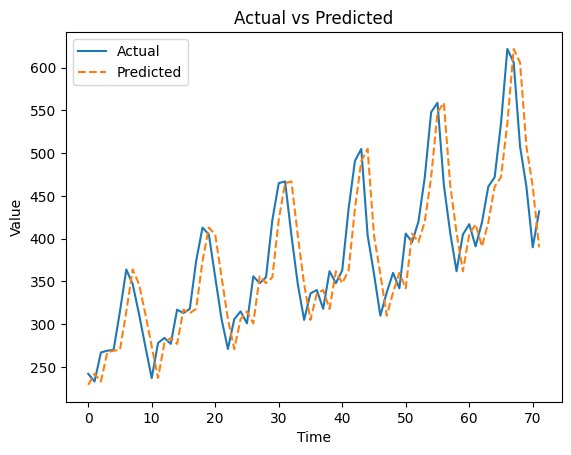

In [6]:
# Tracer les valeurs réelles et prédites
plt.plot(test, label='Actual')
plt.plot(predictions, label='Predicted', linestyle='--')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.title('Actual vs Predicted')
plt.show()

***Dans ce cas, nous pouvons voir que le modèle de persistance a obtenu une RMSE de 43.529. Cela signifie qu'en moyenne, le modèle s'est trompé d'environ 43 passagers pour chaque prédiction effectuée.***

**<span style="color:red">III - Data Analysis</span>**

**Nous pouvons utiliser des statistiques récapitulatives et des graphiques des données pour en apprendre rapidement davantage sur la structure du problème de prédiction. Dans cette section, nous examinerons les données selon quatre perspectives:**
1. Summary Statistics.
2. Line Plot.
3. Multiplicative decomposition
4. Density Plots.
5. Box and Whisker Plot.

**<span style="color:green; margin-left: 20px;">II - 1 - Summary Statistics</span>**

In [7]:
print(series.describe())

count    144.000000
mean     280.298611
std      119.966317
min      104.000000
25%      180.000000
50%      265.500000
75%      360.500000
max      622.000000
Name: #Passengers, dtype: float64


***Les statistiques suivantes résument les caractéristiques principales de la série temporelle des passagers aériens internationaux :***
- Le nombre d'observations (count) correspond à nos attentes, indiquant que nous manipulons correctement les données.
- La moyenne des passagers aériens internationaux est d'environ 280.30.
- L'écart type, qui mesure la dispersion des données, est d'environ 119.97.
- Le nombre minimum de passagers en un mois est de 104, tandis que le nombre maximum est de 622.
- Les quartiles (25%, 50%, 75%) fournissent des indications sur la distribution des données, montrant que la moitié des observations sont comprises entre 180 et 360 passagers.


**<span style="color:green; margin-left: 20px;">II - 2 - Line Plot</span>**

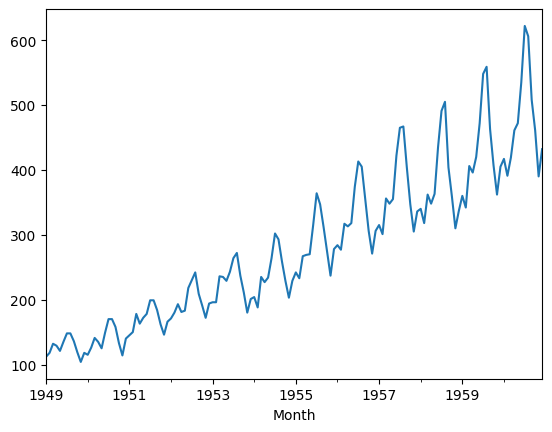

In [8]:
series.plot()
plt.show()

***Le nombre de passagers augmente régulièrement au fil du temps et suit un cycle annuel prévisible. Cependant, à l'intérieur de chaque année, les variations deviennent de plus en plus marquées.***

**<span style="color:green; margin-left: 20px;">II - 3 - Multiplicative decomposition</span>**

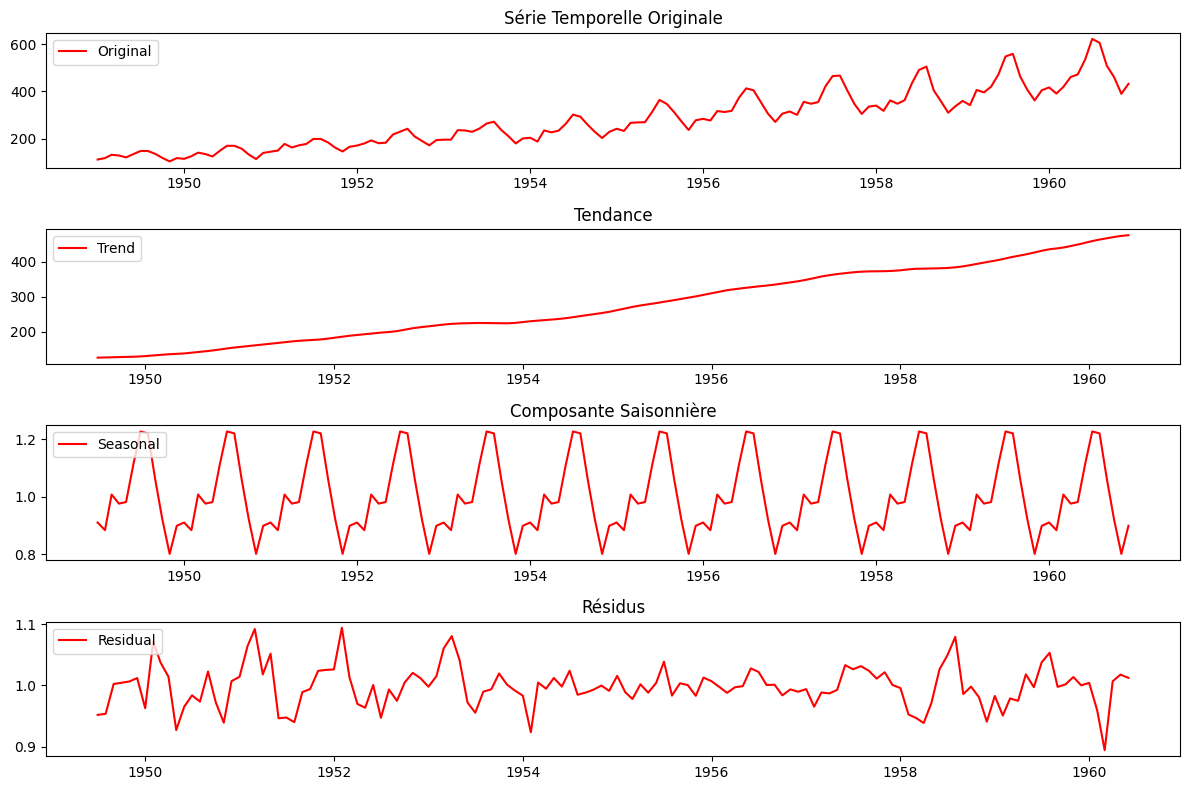

In [9]:
# Effectuer la décomposition saisonnière
result = seasonal_decompose(series, model='multiplicative')
# Tracer les composants de la décomposition
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(series, label='Original', color='red')
plt.legend(loc='upper left')
plt.title('Série Temporelle Originale')
plt.subplot(412)
plt.plot(result.trend, label='Trend', color='red')
plt.legend(loc='upper left')
plt.title('Tendance')
plt.subplot(413)
plt.plot(result.seasonal, label='Seasonal', color='red')
plt.legend(loc='upper left')
plt.title('Composante Saisonnière')
plt.subplot(414)
plt.plot(result.resid, label='Residual', color='red')
plt.legend(loc='upper left')
plt.title('Résidus')
plt.tight_layout()  # Ajuster l'espacement entre les sous-graphiques
plt.show()

***On génère des graphiques pour la série temporelle observée, la tendance, la saisonnalité et les résidus. On peut voir que les informations sur la tendance et la saisonnalité extraites de la série semblent raisonnables. Les résidus sont également intéressants, montrant des périodes de variabilité élevée au début et à la fin de la série temporelle.***

**<span style="color:green; margin-left: 20px;">II - 4 - Density Plot</span>**

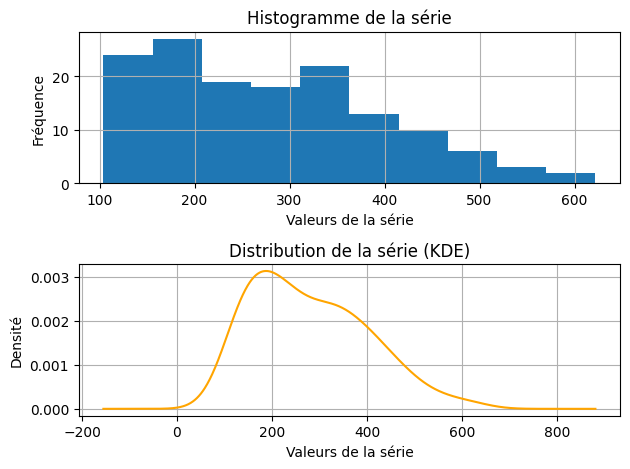

In [10]:
# Supposez que vous voulez visualiser l'histogramme de la série
# Sous-plot 1 : Histogramme
plt.subplot(211)
plt.hist(series) 
plt.title('Histogramme de la série')
plt.xlabel('Valeurs de la série')
plt.ylabel('Fréquence')
plt.grid(True)  # Ajoutez une grille pour une meilleure lisibilité
# Sous-plot 2 : KDE (Kernel Density Estimate)
plt.subplot(212)
series.plot(kind='kde', color='orange')  # Tracé de la distribution de la série (kernel density estimate)
plt.title('Distribution de la série (KDE)')
plt.xlabel('Valeurs de la série')
plt.ylabel('Densité')
plt.grid(True)  # Ajoutez une grille pour une meilleure lisibilité
plt.tight_layout()  # Ajustez l'espacement entre les sous-graphiques pour éviter les chevauchements
plt.show()

***L'exécution montre que la distribution des valeurs ne ressemble pas à une distribution gaussienne, donc les valeurs de la moyenne et de la variance sont moins significatives. Cette distribution écrasée des observations peut être un autre indicateur d'une série temporelle non stationnaire.***

**<span style="color:green; margin-left: 20px;">II - 5 - Box and Whisker Plots</span>**

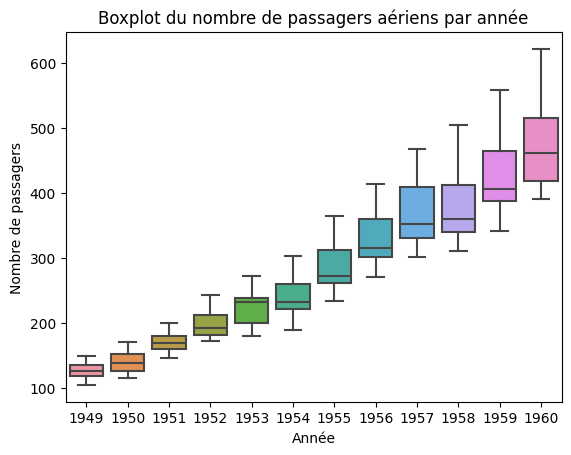

In [11]:
# Grouper par année et créer un DataFrame
groups = series['1949':'1960'].groupby(pd.Grouper(freq='A'))
years = pd.DataFrame()

for name, group in groups:
    # Ajouter la colonne spécifique à partir de group
    years[name.year] = group.values.flatten()
# Tracer le boxplot
sns.boxplot(data=years)
plt.title('Boxplot du nombre de passagers aériens par année')
plt.xlabel('Année')
plt.ylabel('Nombre de passagers')
plt.show()

**Notre série affiche une tendance linéaire à la hausse chaque année, suggérant une croissance constante, particulièrement prononcée en juin, juillet et août. De plus, aucune valeur aberrante n'est observée, indiquant une stabilité dans le schéma de croissance.**

## Partie I : ARIMA Models
ARIMA signifie AutoRegressive Integrated Moving Average. C'est une méthode statistique utilisée pour la prévision des séries temporelles. Les modèles ARIMA combinent trois composantes clés :

* **AutoRégressif (AR):** Cette composante représente la relation entre l'observation actuelle et ses observations passées. Elle suppose que la valeur future de la série temporelle peut être prédite en fonction de ses propres valeurs passées.
                                                                                                                  

* **Intégré (I) :** Cette composante implique la différenciation des données de la série temporelle pour les rendre stationnaires. Les données stationnaires ont une moyenne et une variance constantes au fil du temps, ce qui simplifie le processus de modélisation.


* **Moyenne Mobile (MA) :** Cette composante prend en compte la corrélation entre une observation actuelle et une erreur résiduelle d'un modèle de moyenne mobile appliqué aux observations passées.
Développer un modèle ARIMA configuré manuellement.

Chacune de ces composantes est explicitement spécifiée dans le modèle en tant que paramètre
Une notation standard est utilisée, ARIMA(p, d, q)

* **p** : Le nombre d'observations retardées incluses dans le modèle, également appelé l'ordre de retard.

* **d** : Le nombre de fois que les observations brutes sont différenciées, également appelé le degré de différenciation.

* **q** : La taille de la fenêtre de la moyenne mobile, également appelée l'ordre de la moyenne mobile.

Dans cette étude, nous aborderons

* ***le Développement un modèle ARIMA configuré manuellement***

* ***Utilisation de Grid Search d'ARIMA pour trouver un modèle optimisé.***

* ***Analyse des erreurs résiduelles de la prévision pour évaluer tout biais dans le modèle.***

* ***Verification de la qualité du model***

**<span style="color:red">I - Développement manuel d'un modèle ARIMA</span>**

**L'ARIMA (p, d, q) nécessite trois paramètres et est traditionnellement configuré manuellement
L'analyse des données de séries temporelles suppose que nous travaillons avec une série temporelle stationnaire. Il est probable que la série temporelle ne soit pas stationnaire. Nous pouvons la rendre stationnaire en différenciant d'abord la série et en utilisant un test statistique pour confirmer que le résultat est stationnaire.**


**<span style="color:green; margin-left: 20px;">I - 1 - Vérification de la stationnarité</span>**

Selon l'analyse graphique de l'évolution du nombre de passagers aériens et les statistiques sommaires que nous avons précédemment effectuées, il est clair qu'une tendance et une saisonnalité sont présentes dans la série chronologique. Cela indique que la série chronologique n'est pas stationnaire.

Pour vérifier formellement la stationnarité, nous utilisons un test statistique appelé test de Dickey-Fuller augmenté (ADF). La formulation est la suivante :

* **Hypothèse nulle (H0) :** Les données ne sont pas stationnaires.
* **Hypothèse alternative (H1) :** Les données sont stationnaires.
En utilisant le test de Dickey-Fuller, nous obtenons une valeur p.
* **Si p< 0,05 :** Les données sont stationnaires
* **Si p>0,05  :** Les données ne sont pas stationnaires

**<span style="color:blue; margin-left: 50px;">I - 1 - 1 - Test de Dickey-Fuller augmenté (ADF).</span>**

In [12]:
from statsmodels.tsa.stattools import adfuller

X = series.values
result = adfuller(X)

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

if result[1] <= 0.05:
    print("La série temporelle est stationnaire.")
else:
    print("La série temporelle n'est pas stationnaire.")

ADF Statistic: 0.815369
p-value: 0.991880
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579
La série temporelle n'est pas stationnaire.


***nous pourrions utiliser la différenciation pour rendre la série stationnaire en eliminant ces composantes.Il se pourrait même que nous ayons besoin de deux niveaux de différenciation***

In [13]:
X = series.values
diff = list()
for i in range(1, len(X)):
    value = X[i] - X[i - 1]
    diff.append(value)

In [14]:
result = adfuller(diff)
# La fonction adfuller retourne plusieurs statistiques de test et leur signification.
# Le test d'ADF a une statistique de test et une valeur critique à laquelle la statistique doit être comparée.
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
     print('\t%s: %.3f' % (key, value))
# Interprétation des résultats
if result[1] <= 0.05:
    print("La série temporelle est stationnaire (rejet de l'hypothèse nulle)")
else:
    print("La série temporelle n'est pas stationnaire (échec du rejet de l'hypothèse nulle)")

ADF Statistic: -2.829267
p-value: 0.054213
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579
La série temporelle n'est pas stationnaire (échec du rejet de l'hypothèse nulle)


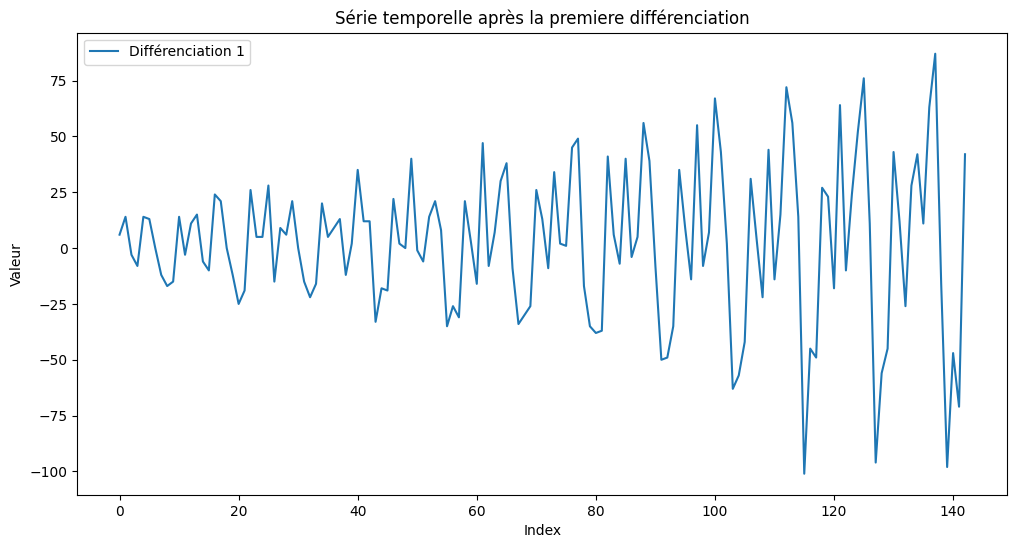

In [15]:
# Tracer la série temporelle différenciée
plt.figure(figsize=(12, 6))
plt.plot(diff, label='Différenciation 1')
# Ajouter une légende et des titres
plt.legend()
plt.title('Série temporelle après la premiere différenciation')
plt.xlabel('Index')
plt.ylabel('Valeur')
# Afficher le graphique
plt.show()

In [16]:
diff2 = list()
for i in range(1, len(diff)):
    value = diff[i] - diff[i - 1]
    diff2.append(value)

In [17]:
from statsmodels.tsa.stattools import adfuller

# Supposons que "diff2" soit votre deuxième série temporelle différenciée
result_diff2 = adfuller(diff2)

# Affichage des résultats
print('ADF Statistic après la deuxième différenciation:', result_diff2[0])
print('p-value après la deuxième différenciation:', result_diff2[1])
print('Critical Values après la deuxième différenciation:')
for key, value in result_diff2[4].items():
     print('\t%s: %.3f' % (key, value))


# Interprétation des résultats
if result_diff2[1] <= 0.05:
    print("La série temporelle est maintenant stationnaire (rejet de l'hypothèse nulle)")
else:
    print("La série temporelle n'est toujours pas stationnaire (échec du rejet de l'hypothèse nulle)")

ADF Statistic après la deuxième différenciation: -16.384231542468527
p-value après la deuxième différenciation: 2.732891850014085e-29
Critical Values après la deuxième différenciation:
	1%: -3.482
	5%: -2.884
	10%: -2.579
La série temporelle est maintenant stationnaire (rejet de l'hypothèse nulle)


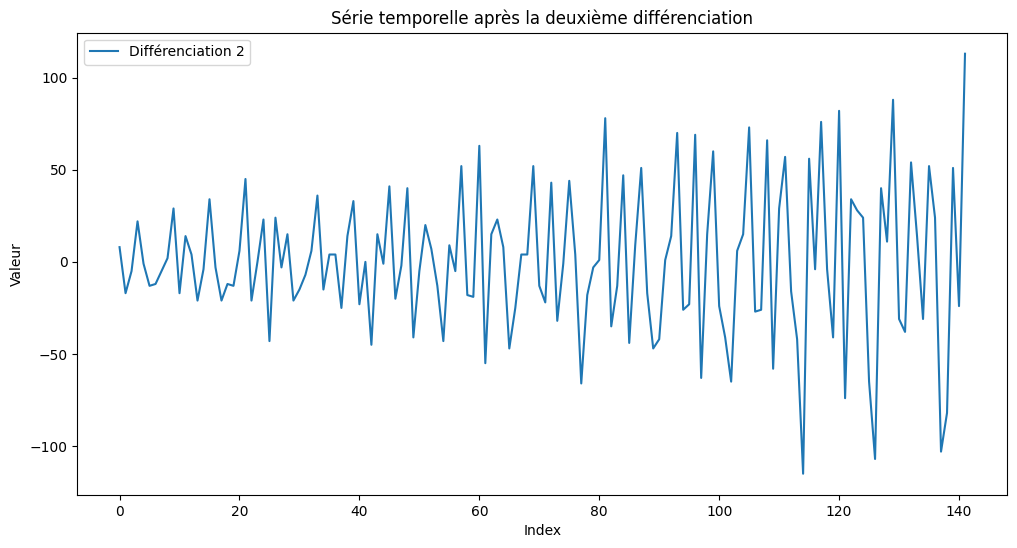

In [18]:
# Tracer la série temporelle différenciée
plt.figure(figsize=(12, 6))
plt.plot(diff2, label='Différenciation 2')
# Ajouter une légende et des titres
plt.legend()
plt.title('Série temporelle après la deuxième différenciation')
plt.xlabel('Index')
plt.ylabel('Valeur')
# Afficher le graphique
plt.show()

***Cela suggère qu'au moins deux niveaux de différenciations sont nécessaires. Le paramètre d dans notre modèle ARIMA devrait au moins avoir une valeur de 2. La prochaine étape consiste à sélectionner les valeurs de décalage pour les paramètres d'autorégression (AR) et de moyenne mobile (MA), respectivement p et q***

***Nous pouvons le faire en examinant les graphiques de la Fonction d'Autocorrélation (ACF) et de la Fonction d'Autocorrélation 
Partielle (PACF).
L'objectif de l'utilisation de l'ACF et de la PACF est de guider le choix des ordres (p, d, q) dans le contexte des modèles ARIMA (AutoRegressive Integrated Moving Average) pour modéliser et prédire les séries temporelles. La composante AR (AutoRegressive) est liée à l'ACF, tandis que la composante MA (Moving Average) est liée à la PACF.***

C:\Users\User\anaconda3\Lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


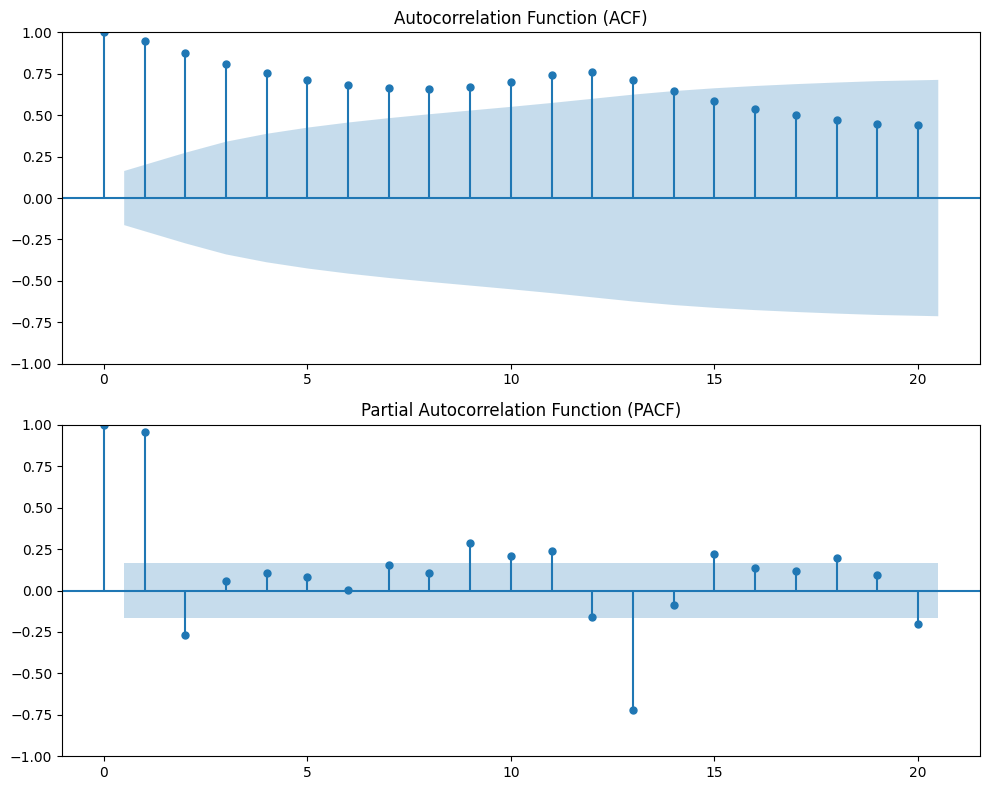

In [19]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

series = pd.read_csv('AirPassengers.csv', header=None, index_col=0, parse_dates=True, skiprows=1)
series = series.squeeze()
# Créer une figure avec deux sous-graphiques (2 lignes, 1 colonne)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Plot ACF sur le premier sous-graphique
plot_acf(series, lags=20, ax=ax1)
ax1.set_title('Autocorrelation Function (ACF)')

# Plot PACF sur le deuxième sous-graphique
plot_pacf(series, lags=20, ax=ax2)
ax2.set_title('Partial Autocorrelation Function (PACF)')

# Ajuster l'espacement entre les sous-graphiques
plt.tight_layout()

# Afficher la figure
plt.show()

***Un bon point de départ pour p est 13 et q est 8.
Cette analyse rapide suggère qu'un modèle ARIMA(13,2,8) sur les données brutes peut être un bon point de départ. L'exemple complet de modèle ARIMA configuré manuellement est présenté ci-dessous.***

**<span style="color:blue; margin-left: 50px;">I - 1 - 2 - Modélisation ARIMA pour la Prédiction</span>**

In [20]:
from statsmodels.tsa.arima.model import ARIMA
X = series.values
X = X.astype('float32')

# Split the data into training and test sets
train_size = int(len(X) * 0.7)
train, test = X[0:train_size], X[train_size:]
# Walk-forward validation
history = [x for x in train]
predictions1 = list()

for i in range(len(test)):
    # Fit the ARIMA model
    model = ARIMA(history, order=(13, 2, 8))
    model_fit = model.fit()

    # Make a one-step forecast
    yhat = model_fit.forecast()[0]
    predictions1.append(yhat)

    # Observation for the current step
    obs = test[i]
    history.append(obs)

    # Print the predicted and observed values
    print('> Predicted=%.3f, Expected=%.3f' % (yhat, obs))

# Calculate RMSE for the test set
rmse = sqrt(mean_squared_error(test, predictions1))
print('RMSE: %.3f' % rmse)

C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\User\anaconda3\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


> Predicted=354.815, Expected=355.000


C:\Users\User\anaconda3\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


> Predicted=406.986, Expected=422.000


C:\Users\User\anaconda3\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


> Predicted=453.962, Expected=465.000


C:\Users\User\anaconda3\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


> Predicted=454.659, Expected=467.000


C:\Users\User\anaconda3\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


> Predicted=420.156, Expected=404.000


C:\Users\User\anaconda3\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


> Predicted=351.150, Expected=347.000


C:\Users\User\anaconda3\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


> Predicted=318.390, Expected=305.000


C:\Users\User\anaconda3\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


> Predicted=338.452, Expected=336.000


C:\Users\User\anaconda3\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


> Predicted=347.518, Expected=340.000


C:\Users\User\anaconda3\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


> Predicted=328.390, Expected=318.000


C:\Users\User\anaconda3\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


> Predicted=371.534, Expected=362.000


C:\Users\User\anaconda3\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


> Predicted=359.889, Expected=348.000


C:\Users\User\anaconda3\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


> Predicted=360.084, Expected=363.000


C:\Users\User\anaconda3\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


> Predicted=430.266, Expected=435.000


C:\Users\User\anaconda3\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


> Predicted=483.234, Expected=491.000


C:\Users\User\anaconda3\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


> Predicted=489.963, Expected=505.000


C:\Users\User\anaconda3\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


> Predicted=449.900, Expected=404.000


C:\Users\User\anaconda3\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


> Predicted=350.746, Expected=359.000


C:\Users\User\anaconda3\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


> Predicted=319.096, Expected=310.000


C:\Users\User\anaconda3\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


> Predicted=340.716, Expected=337.000


C:\Users\User\anaconda3\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


> Predicted=348.628, Expected=360.000


C:\Users\User\anaconda3\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


> Predicted=323.100, Expected=342.000


C:\Users\User\anaconda3\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


> Predicted=383.870, Expected=406.000


C:\Users\User\anaconda3\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


> Predicted=386.639, Expected=396.000


C:\Users\User\anaconda3\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


> Predicted=409.362, Expected=420.000


C:\Users\User\anaconda3\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


> Predicted=484.204, Expected=472.000


C:\Users\User\anaconda3\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


> Predicted=531.389, Expected=548.000


C:\Users\User\anaconda3\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


> Predicted=548.612, Expected=559.000


C:\Users\User\anaconda3\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


> Predicted=470.135, Expected=463.000


C:\Users\User\anaconda3\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


> Predicted=412.791, Expected=407.000


C:\Users\User\anaconda3\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


> Predicted=360.739, Expected=362.000


C:\Users\User\anaconda3\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


> Predicted=385.689, Expected=405.000


C:\Users\User\anaconda3\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


> Predicted=425.302, Expected=417.000


C:\Users\User\anaconda3\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


> Predicted=407.364, Expected=391.000


C:\Users\User\anaconda3\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


> Predicted=442.524, Expected=419.000


C:\Users\User\anaconda3\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


> Predicted=419.240, Expected=461.000


C:\Users\User\anaconda3\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


> Predicted=482.147, Expected=472.000


C:\Users\User\anaconda3\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


> Predicted=526.233, Expected=535.000


C:\Users\User\anaconda3\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


> Predicted=604.383, Expected=622.000


C:\Users\User\anaconda3\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


> Predicted=617.277, Expected=606.000


C:\Users\User\anaconda3\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


> Predicted=538.541, Expected=508.000


C:\Users\User\anaconda3\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


> Predicted=441.672, Expected=461.000


C:\Users\User\anaconda3\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


> Predicted=427.074, Expected=390.000
> Predicted=445.005, Expected=432.000
RMSE: 16.664


C:\Users\User\anaconda3\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


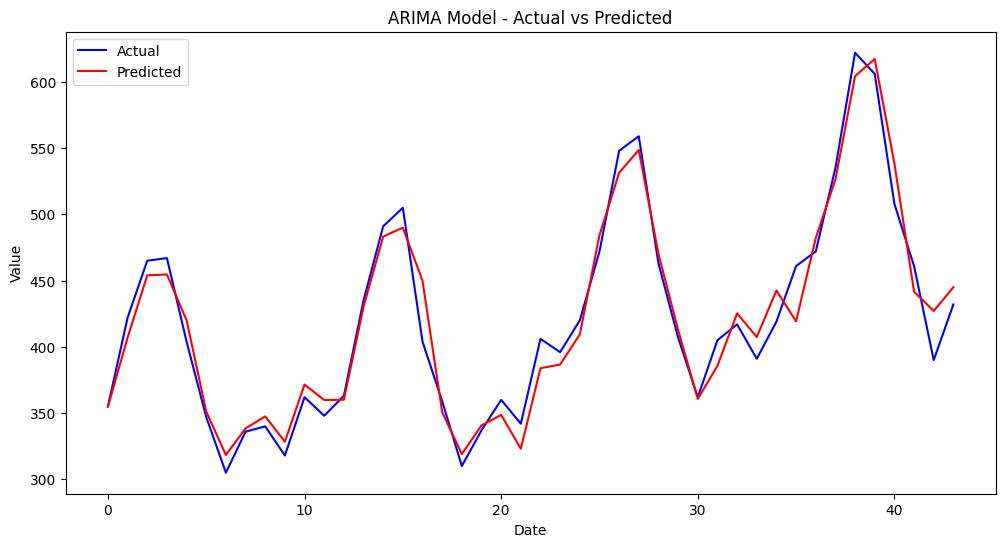

In [21]:
# Tracé des valeurs réelles par rapport aux valeurs prédites avec l'ARIMA
plt.figure(figsize=(12, 6))
plt.plot(test, label='Actual', color='blue')
plt.plot(predictions1, label='Predicted', color='red')
plt.title('ARIMA Model - Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

**<span style="color:red">II - Grid Search d'ARIMA </span>**

**La recherche par grille (ou grid search) est une technique systématique d'exploration des hyperparamètres d'un modèle pour trouver la meilleure combinaison qui optimise les performances du modèle. Elle implique de spécifier une "grille" ou une liste de valeurs possibles pour chaque hyperparamètre, puis d'évaluer les performances du modèle pour chaque combinaison possible.**

In [22]:
# Fonction pour évaluer un modèle ARIMA avec un ensemble spécifique de paramètres (p, d, q)
def evaluate_arima_model(train, test, order):
    model = ARIMA(train, order=order)
    model_fit = model.fit()
    predictions2 = model_fit.forecast(steps=len(test))
    rmse = sqrt(mean_squared_error(test, predictions2))
    return rmse, model_fit

# Fonction pour évaluer différentes combinaisons de paramètres
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg, best_model = float("inf"), None, None
    
    # Diviser le DataFrame en ensembles d'entraînement et de test
    train_size = int(len(dataset) * 0.7)  # 70% pour l'entraînement, 30% pour le test
    train_data, test_data = dataset.iloc[:train_size], dataset.iloc[train_size:]

    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p, d, q)
                try:
                    rmse, model_fit = evaluate_arima_model(train_data, test_data, order)
                    if rmse < best_score:
                        best_score, best_cfg, best_model = rmse, order, model_fit
                    print('ARIMA%s RMSE=%.3f' % (order, rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))
    return best_model


# Utilisez les valeurs obtenues de l'ACF et de la PACF comme point de départ
p_start, d_start, q_start = 13, 2, 8

# Définissez une plage de valeurs potentielles à explorer autour des valeurs de départ
p_values = range(p_start - 1, p_start + 2)
d_values = range(d_start - 1, d_start + 2)
q_values = range(q_start - 1, q_start + 2)

# Utilisez la fonction pour obtenir le meilleur modèle
best_model = evaluate_models(series, p_values, d_values, q_values)

C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\User\anaconda3\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to 

ARIMA(12, 1, 7) RMSE=34.550


C:\Users\User\anaconda3\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using 

ARIMA(12, 1, 8) RMSE=39.961


C:\Users\User\anaconda3\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using 

ARIMA(12, 1, 9) RMSE=38.118


C:\Users\User\anaconda3\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using 

ARIMA(12, 2, 7) RMSE=29.581


C:\Users\User\anaconda3\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using 

ARIMA(12, 2, 8) RMSE=29.111


C:\Users\User\anaconda3\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using 

ARIMA(12, 2, 9) RMSE=29.015


C:\Users\User\anaconda3\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using 

ARIMA(12, 3, 7) RMSE=41.343


C:\Users\User\anaconda3\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using 

ARIMA(12, 3, 8) RMSE=44.829


C:\Users\User\anaconda3\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using 

ARIMA(12, 3, 9) RMSE=30.351


C:\Users\User\anaconda3\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using 

ARIMA(13, 1, 7) RMSE=30.721


C:\Users\User\anaconda3\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using 

ARIMA(13, 1, 8) RMSE=32.401


C:\Users\User\anaconda3\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using 

ARIMA(13, 1, 9) RMSE=30.732


C:\Users\User\anaconda3\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using 

ARIMA(13, 2, 7) RMSE=28.599


C:\Users\User\anaconda3\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(13, 2, 8) RMSE=30.938


C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\User\anaconda3\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWa

ARIMA(13, 2, 9) RMSE=29.642


C:\Users\User\anaconda3\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using 

ARIMA(13, 3, 7) RMSE=100.302


C:\Users\User\anaconda3\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using 

ARIMA(13, 3, 8) RMSE=29.695


C:\Users\User\anaconda3\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using 

ARIMA(13, 3, 9) RMSE=32.656


C:\Users\User\anaconda3\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using 

ARIMA(14, 1, 7) RMSE=35.953


C:\Users\User\anaconda3\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using 

ARIMA(14, 1, 8) RMSE=31.431


C:\Users\User\anaconda3\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using 

ARIMA(14, 1, 9) RMSE=37.265


C:\Users\User\anaconda3\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using 

ARIMA(14, 2, 7) RMSE=29.797


C:\Users\User\anaconda3\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using 

ARIMA(14, 2, 8) RMSE=30.182


C:\Users\User\anaconda3\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using 

ARIMA(14, 2, 9) RMSE=29.270


C:\Users\User\anaconda3\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using 

ARIMA(14, 3, 7) RMSE=33.693


C:\Users\User\anaconda3\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using 

ARIMA(14, 3, 8) RMSE=30.172
ARIMA(14, 3, 9) RMSE=53.545
Best ARIMA(13, 2, 7) RMSE=28.599


C:\Users\User\anaconda3\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


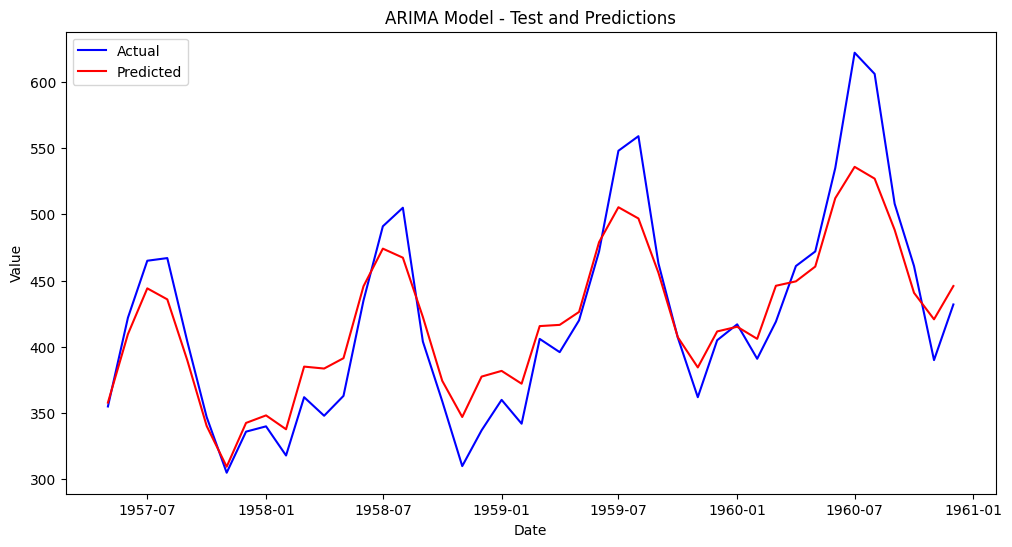

In [23]:
# Diviser le DataFrame en ensembles d'entraînement et de test
train_size = int(len(series) * 0.7)  # 70% pour l'entraînement, 30% pour le test
train_data, test_data = series.iloc[:train_size], series.iloc[train_size:]

# Effectuer des prédictions sur l'ensemble de test avec le meilleur modèle
predictions2 = best_model.forecast(steps=len(test_data))

# Afficher uniquement les observations de l'ensemble de test et les prédictions
plt.figure(figsize=(12, 6))
plt.plot(test_data, label='Actual', color='blue')
plt.plot(predictions2, label='Predicted', color='red')
plt.title('ARIMA Model - Test and Predictions')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

***Cela suggère que la configuration manuelle a conduit à un modèle qui a performé mieux en termes de précision, comme indiqué par le RMSE plus bas de 16.668. D'un autre côté, la technique de Grid Search a sélectionné un modèle avec des paramètres légèrement différents, mais qui a produit un RMSE légèrement plus élevé de 28.60***

**<span style="color:red">III - Examen des Erreurs Résiduelles </span>**

***Une bonne vérification finale d'un modèle consiste à examiner les erreurs résiduelles de la prévision. Idéalement, la distribution des erreurs résiduelles devrait être gaussienne avec une moyenne nulle. Nous pouvons vérifier cela en représentant les résidus avec un histogramme et des graphiques de densité. L'exemple ci-dessous calcule les erreurs résiduelles pour les prédictions sur l'ensemble de test et crée ces graphiques de densité.***

C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\User\anaconda3\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\User\anaconda3\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\User\anaconda3\Lib\site-packages\statsmodels\base\model.py:6

               0
count  44.000000
mean   -0.564180
std    16.847287
min   -45.900063
25%   -10.611906
50%    -1.133321
75%    11.121574
max    41.760389


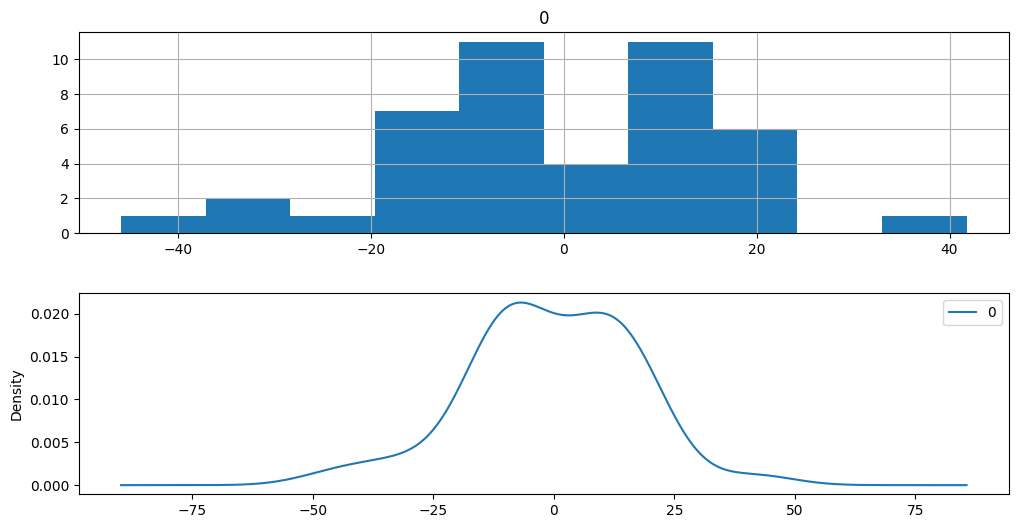

In [24]:
X = series.values
X = X.astype('float32')
train_size = int(len(X) * 0.7)
train, test = X[0:train_size], X[train_size:]
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    # predict
    model = ARIMA(history, order=(13,2,8))
    model_fit = model.fit()
    yhat = model_fit.forecast()[0]
    predictions.append(yhat)
    # observation
    obs = test[i]
    history.append(obs)
# errors
residuals = [test[i]-predictions[i] for i in range(len(test))]
residuals = DataFrame(residuals)
print(residuals.describe())
plt.figure(figsize=(12, 6))
plt.subplot(211)
residuals.hist(ax=plt.gca())
plt.subplot(212)
residuals.plot(kind='kde', ax=plt.gca())
plt.show()

***L'ajout de biais dans nos prédictions est une approche raisonnable. Cela permet de corriger systématiquement les erreurs moyennes et peut améliorer la performance de notre modèle en rendant les prédictions plus précises.
En examinant les résidus, ce résultat pourrait suggérer la présence d'un biais dans les prédictions du modèle.
Nous pourrions utiliser cette information pour corriger les prédictions en ajoutant l'erreur résiduelle moyenne  à chaque prévision effectuée. L'exemple ci-dessous effectue cette correction de biais.***

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model

RMSE: 16.660
               0
count  44.000000
mean    0.000003
std    16.852770
min   -45.400587
25%   -10.104011
50%    -0.627129
75%    11.649538
max    42.259918


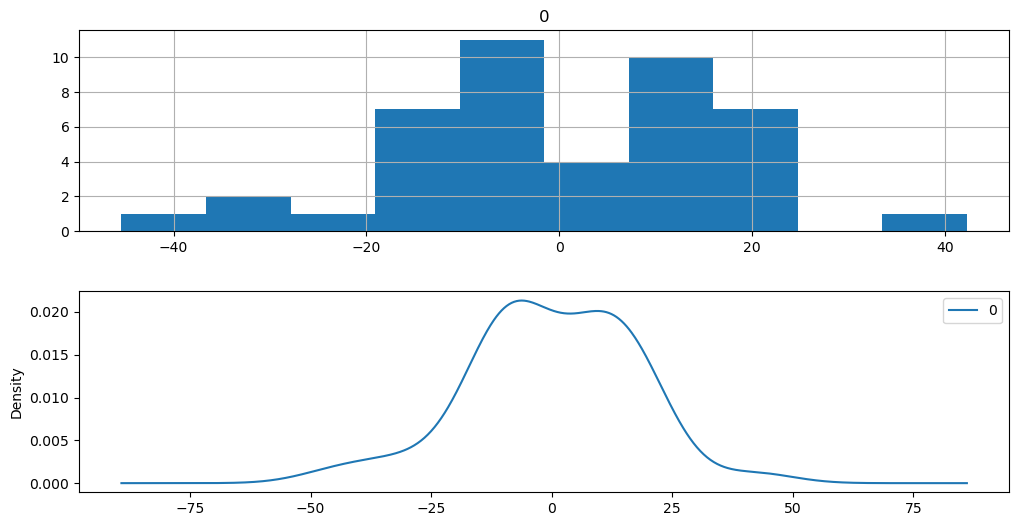

In [27]:
X = series.values
X = X.astype('float32')
train_size = int(len(X) * 0.7)
train, test = X[0:train_size], X[train_size:]
# walk-forward validation
history = [x for x in train]
predictions = list()
bias = -0.499498
for i in range(len(test)):
    # predict
    model = ARIMA(history, order=(13,2,8))
    model_fit = model.fit()
    yhat = bias + float(model_fit.forecast()[0])
    predictions.append(yhat)

    # observation
    obs = test[i]
    history.append(obs)
    # report performance
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)
# summarize residual errors
residuals = [test[i]-predictions[i] for i in range(len(test))]
residuals = DataFrame(residuals)
print(residuals.describe())
# plot residual errors
plt.figure(figsize=(12, 6))
plt.subplot(211)
residuals.hist(ax=plt.gca())
plt.subplot(212)
residuals.plot(kind='kde', ax=plt.gca())
plt.show()

***On a inclus ce biais pour aligner les prédictions avec les valeurs réelles et obtenir une meilleure performance
Le résumé des erreurs résiduelles de la prévision montre que la moyenne a effectivement été déplacée vers une valeur très proche de zéro.***

**<span style="color:red">IV - Verification de la qualité du model </span>**

***Dans cette phase, nous utilisons initialement notre modèle ARIMA ajusté pour effectuer des prédictions basées sur les données de test. Par la suite, nous procédons à une évaluation en effectuant des calculs afin de comparer les résultats prédits de notre modèle avec les données réelles de notre jeu de test.***

In [1]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt


X = series.values
X = X.astype('float32')

# Supposons que len(X) * 0.7 est votre taille d'ensemble d'entraînement
train_size = int(len(X) * 0.7)
train, test = X[0:train_size], X[train_size:]

# Fit the ARIMA model
model = ARIMA(train, order=(13, 2, 8))
model_fit = model.fit()

# Générer des prédictions sur les données de test
start = len(train)
end = len(train) + len(test) - 1
predictions = pd.Series(model_fit.predict(start=start, end=end, typ='levels'), index=series.index[train_size:end+1], name="Prédictions")

# Tracer les prédictions et les données réelles
plt.figure(figsize=(12, 6))
predictions.plot(legend=True)
series[train_size:].plot(legend=True, label='Données réelles')
plt.title('Prédictions ARIMA vs Données Réelles')
plt.xlabel('Date')
plt.ylabel('Nombre de Passagers')
plt.show()

# Calcul du RMSE
rmse = sqrt(mean_squared_error(series[train_size:], predictions))
print(f"Root Mean Squared Error (RMSE) : {rmse}")

NameError: name 'series' is not defined

***Ce code  est une approche standard pour évaluer la qualité d'un modèle ARIMA sur une série temporelle. Ce code suit une procédure courante pour entraîner un modèle ARIMA sur un ensemble d'entraînement, générer des prédictions sur un ensemble de test, et calculer le RMSE pour évaluer la précision du modèle.***

***Comme vous pouvez le constater, les prévisions correspondent assez bien à la tendance réelle, même s'il existe un certain décalage acceptable.
"Le Root Mean Squared Error (RMSE) de  30.94 suggère que, en moyenne, nos prédictions  basées sur le modèle ARIMA diffèrent d'environ  30.94 unités par rapport aux observations réelles de nos données de test. Cette mesure d'erreur nous fournit une indication de la précision relative de notre modèle, où un RMSE plus bas serait préférable pour des prédictions plus précises.***

## Partie II : Modélisation avec ANN

Un réseau de neurones artificiels (ANN), ou réseau neuronal, est un modèle informatique inspiré du fonctionnement du cerveau humain. Il est composé de nœuds interconnectés, appelés neurones, qui traitent l'information en transmettant des signaux les uns aux autres.
<div style="text-align:center;"><img src="ann.png" alt="schema ANN"></div>

**Couche d'entrée (Input Layer) :**
- La couche d'entrée est la première couche du réseau.
- Chaque nœud dans cette couche représente une caractéristique ou une variable d'entrée.
- Les valeurs des nœuds dans cette couche correspondent aux valeurs initiales des données d'entrée. Chaque nœud représente une caractéristique spécifique.

**Couches cachées (Hidden Layers) :**
- Les couches cachées se situent entre la couche d'entrée et la couche de sortie.
- Chaque nœud dans une couche cachée effectue une transformation non linéaire des signaux provenant de la couche précédente.
- Ces couches permettent au réseau de capturer des relations complexes et des motifs dans les données qui peuvent être difficiles à percevoir avec une simple couche d'entrée.

**Couche de sortie (Output Layer) :**
- La couche de sortie est la dernière couche du réseau.
- Chaque nœud dans cette couche représente une sortie ou une prédiction du modèle.
- Les valeurs des nœuds dans cette couche sont les résultats finaux du traitement effectué par le réseau sur les données d'entrée.

In [70]:
# Importation des bibliothèques nécessaires

from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import math

**Sequential :** C'est une classe de Keras qui permet de créer des modèles séquentiels, où les couches sont ajoutées les unes après les autres.

**Dense :**  C'est une couche de neurones fully connected (entièrement connectée) dans un réseau de neurones.

**MinMaxScaler :**  C'est une classe de scikit-learn utilisée pour normaliser (mettre à l'échelle) les données dans une plage spécifique, généralement entre 0 et 1.

**mean_squared_error :** calcule la moyenne des carrés des différences entre les valeurs prédites par le modèle et les valeurs réelles des données.

**<span style="color:red">I- Lecture et préparation des données</span>**

In [71]:
df = pd.read_csv('AirPassengers.csv', header=0, index_col=0, parse_dates=True)
df.squeeze()

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
             ... 
1960-08-01    606
1960-09-01    508
1960-10-01    461
1960-11-01    390
1960-12-01    432
Name: #Passengers, Length: 144, dtype: int64

In [72]:
dataset = df['#Passengers'].values
dataset = dataset.astype('float32')
dataset = np.expand_dims(dataset,axis=-1)

**Extraction de la colonne '#Passengers' :**
- On extrait la colonne '#Passengers' du DataFrame `df` et on la stocke dans la variable `dataset`.

**Conversion en type de données float32 :**
- Ensuite, on convertit les valeurs de `dataset` en type de données `float32`.
- Cette conversion est souvent nécessaire pour les modèles d'apprentissage automatique, notamment ceux basés sur des réseaux de neurones, qui fonctionnent généralement mieux avec des données en virgule flottante plutôt qu'avec des entiers.

**Ajout d'une dimension supplémentaire :**
- Enfin, on ajoute une dimension supplémentaire au `dataset`.
- Elle est généralement effectuée si le modèle s'attend à une entrée de forme (batch_size, time_steps, features).
- L'ajout de cette dimension supplémentaire semble être lié à la représentation des caractéristiques (passagers) du dataset.

In [73]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

***Ce code utilise le MinMaxScaler pour mettre à l'échelle les valeurs du dataset dans la plage spécifiée (0, 1). Cette étape de mise à l'échelle est souvent utilisée dans le prétraitement des données pour normaliser les valeurs et faciliter l'entraînement des modèles, en particulier lorsqu'on utilise des algorithmes sensibles à l'échelle des données, tels que les réseaux de neurones.***

In [74]:
#diviser la data en train et test
train_size = int(len(dataset) * 0.7)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [75]:
def to_sequences(dataset, seq_size):
    x = []
    y = []

    for i in range(len(dataset)-seq_size-1):
        window = dataset[i:(i+seq_size), 0]
        x.append(window)
        y.append(dataset[i+seq_size, 0])
        
    return np.array(x),np.array(y)

***Cette fonction to_sequences prend en entrée un dataset temporel (sous forme de tableau 2D) et un paramètre seq_size qui spécifie la taille de la séquence. Elle crée des séquences d'entrée (x) et de sortie (y) pour l'entraînement d'un modèle prédictif***

|   X   |   Y   |
|-------|-------|
|  112  |  118  |
|  118  |  132  |
|  132  |  129  |
|  129  |  121  |
|  121  |  135  |

In [76]:
seq_size = 20 
trainX, trainY = to_sequences(train, seq_size);
testX, testY = to_sequences(test, seq_size);

**<span style="color:red">II - Création et compilation du modèle ANN</span>**

In [77]:
import tensorflow as tf
import tensorflow.keras
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, input_dim=seq_size, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1),
])
model.compile(loss='mean_squared_error', optimizer='adam')
print(model.summary()) 

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 64)                1344      
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dense_11 (Dense)            (None, 1)                 33        
                                                                 
Total params: 3457 (13.50 KB)
Trainable params: 3457 (13.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


<div style="text-align:center;"><img src="layer.png" alt=""></div>

***- Le modèle qu'on a crée, est un réseau neuronal séquentiel avec trois couches denses. La première couche a 64 neurones, la deuxième a 32 neurones, et la troisième a 1 neurone. Le modèle est compilé avec la fonction de perte mean_squared_error et l'optimiseur Adam.***

***- Adam (Adaptive Moment Estimation) est un algorithme d'optimisation populaire en apprentissage profond qui ajuste dynamiquement les taux d'apprentissage pour chaque paramètre du modèle, en utilisant des estimations du premier et du deuxième moment des gradients.***

***- Le résumé affiche que le modèle a 3457 paramètres au total, tous étant entraînables.***

**<span style="color:red">III - Entraînement du modèle</span>**

In [78]:
model.fit(trainX, trainY, validation_data=(testX, testY),verbose=2, epochs=100)

Epoch 1/100
3/3 - 1s - loss: 0.0779 - val_loss: 0.2197 - 1s/epoch - 383ms/step
Epoch 2/100
3/3 - 0s - loss: 0.0271 - val_loss: 0.0574 - 95ms/epoch - 32ms/step
Epoch 3/100
3/3 - 0s - loss: 0.0079 - val_loss: 0.0270 - 64ms/epoch - 21ms/step
Epoch 4/100
3/3 - 0s - loss: 0.0078 - val_loss: 0.0380 - 62ms/epoch - 21ms/step
Epoch 5/100
3/3 - 0s - loss: 0.0107 - val_loss: 0.0357 - 63ms/epoch - 21ms/step
Epoch 6/100
3/3 - 0s - loss: 0.0089 - val_loss: 0.0239 - 63ms/epoch - 21ms/step
Epoch 7/100
3/3 - 0s - loss: 0.0056 - val_loss: 0.0200 - 48ms/epoch - 16ms/step
Epoch 8/100
3/3 - 0s - loss: 0.0041 - val_loss: 0.0247 - 63ms/epoch - 21ms/step
Epoch 9/100
3/3 - 0s - loss: 0.0046 - val_loss: 0.0297 - 95ms/epoch - 32ms/step
Epoch 10/100
3/3 - 0s - loss: 0.0049 - val_loss: 0.0278 - 63ms/epoch - 21ms/step
Epoch 11/100
3/3 - 0s - loss: 0.0044 - val_loss: 0.0215 - 65ms/epoch - 22ms/step
Epoch 12/100
3/3 - 0s - loss: 0.0036 - val_loss: 0.0165 - 79ms/epoch - 26ms/step
Epoch 13/100
3/3 - 0s - loss: 0.0032 -

**<span style="color:red">IV - Prédiction et évaluation du modèle</span>**

In [79]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

1/1 [==============================] - 0s 32ms/step


In [80]:
trainPredict = scaler.inverse_transform(trainPredict) # predicted 
trainY_inverse = scaler.inverse_transform([trainY]) # original
testPredict = scaler.inverse_transform(testPredict)
testY_inverse = scaler.inverse_transform([testY])

***Après la prédiction, on doit effectuer une transformation inverse pour revenir à l'échelle d'origine des prédictions et des étiquettes après avoir utilisé une mise à l'échelle (scaling) pour l'entraînement du modèle.***

In [81]:
trainScore = math.sqrt(mean_squared_error(trainY_inverse[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))

testScore = math.sqrt(mean_squared_error(testY_inverse[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 10.29 RMSE
Test Score: 16.83 RMSE


***Le résultat obtenu avec un RMSE de 16.83 sur l'ensemble de test indique que les prédictions du modèle ont une erreur quadratique moyenne d'environ 16.83 unités par rapport aux valeurs réelles de l'ensemble de test. Ce qui pourrait être considéré comme acceptable.***

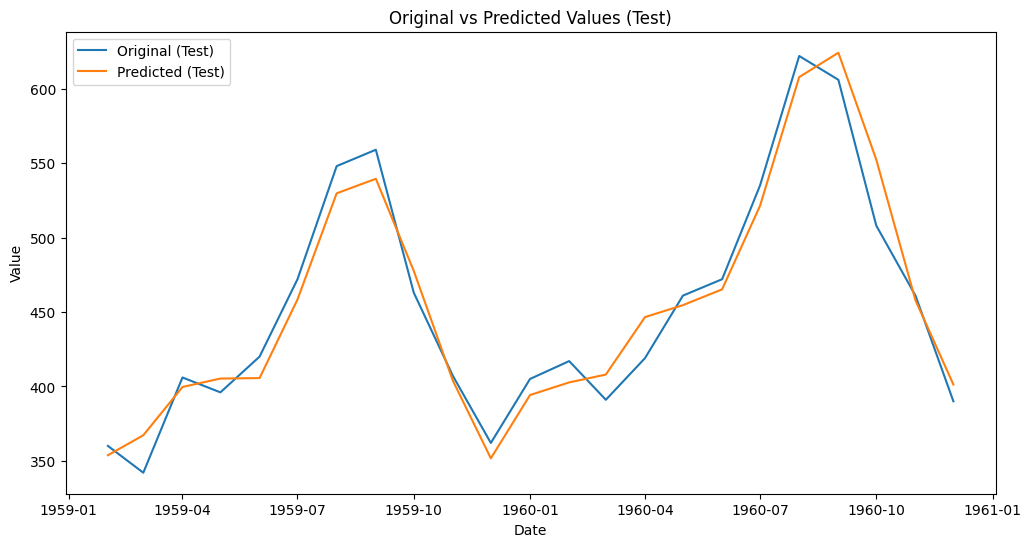

In [82]:
# Plot the original and predicted values for test data
plt.figure(figsize=(12, 6))
plt.plot(df.index[-len(testY_inverse.flatten()):], testY_inverse.flatten(), label='Original (Test)')
plt.plot(df.index[-len(testPredict.flatten()):], testPredict.flatten(), label='Predicted (Test)')
plt.title('Original vs Predicted Values (Test)')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

Le graphique illustre la comparaison entre les valeurs d'origine et les valeurs prédites sur l'ensemble de test. On observe que les valeurs prédites suivent de près les valeurs d'origine, en particulier à partir du 7e jour de l'année 1960, suggérant une bonne concordance entre le modèle et les données réelles à partir de cette période.

## Partie III : Modélisation avec LSTM

<div style="text-align:center;"><img src="image1.png" alt="schema LSTM"></div>

## Fonctionnement d'une Cellule Mémoire dans un LSTM

Un réseau LSTM (Long Short-Term Memory) utilise une cellule mémoire spéciale avec trois portes distinctes pour réguler le flux d'informations, permettant ainsi de gérer efficacement les dépendances à long term.

### Portes de la Cellule Mémire

1. **Porte d'Entrée (Input Gate) :**
   - Intègre de nouvelles informations (\(x_t\)) et l'état précédent de la cellule mémoire (\(h_{t-1}\)).
   - Génère un vecteur d'activation représentant les informations à ajouter à la cellule mémoire (\(c_{t-1}\)).

2. **Porte d'Oubli (Forget Gate) :**
   - Utilise l'entrée actuelle et l'état précédent pour générer un vecteur d'activation.
   - Détermine quelles informations de la cellule mémoire précédente (\(c_{t-1}\)) doivent être oubliées.

3. **Porte de Sortie (Output Gate) :**
   - Utilise l'entrée actuelle (\(x_t\)) et l'état actuel de la cellule mémoire (\(c_t\)).
   - Génère un vecteur d'activation représentant la sortie duLSTM (\(h_t\)).

### Mémoire à Log Terme et Courte

- \(c_t\) représente la mémoire à long terme.
- \(h_t\) représente la mémoirecourte (état cché).

### Avantages

- Gestion efficace des dépendances à long terme.
- Résolution du problème du "vanishing gradient" lors de la rétropropagation.
- Deux états (\(c_t\) et \(h_t\)) permettent la mémoristion et l'oubli sélectifs.

Cette architecture confère aux LSTM la capacité de mémoriser des informations importantes sur de longues séquences tout en ignorant les éléments moins pertinents, assurant un apprentissage stable et précis.


In [83]:
# Importation des bibliothèques nécessaires
import tensorflow as tf
from tensorflow import keras
from keras.layers import LSTM
from keras.models import Sequential
from keras.layers import Dense

**<span style="color:red">I - Lecture et préparation des données</span>**

In [84]:
# preparer les données
series =pd.read_csv('AirPassengers.csv', header=0, index_col=0, parse_dates=True)
series = series.squeeze()
print(series.head())
X = series.values

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: #Passengers, dtype: int64


***Les LSTM sont sensibles à l'échelle des données d'entrée, en particulier lorsque les fonctions d'activation sigmoïde (par défaut) ou tangente hyperbolique sont utilisées. Il peut être judicieux de normaliser les données dans la plage de 0 à 1, également appelée normalisation. Vous pouvez facilement normaliser le jeu de données à l'aide de la classe de prétraitement MinMaxScaler de la bibliothèque scikit-learn***

In [85]:
#Applying min max scaler for better fitting
scaler= MinMaxScaler()
X=np.array(X).reshape(-1,1)
X=scaler.fit_transform(X)
train_size=int(0.7*len(X))
test_size=len(X)-train_size
train=X[0:train_size,:]
test=X[train_size:,:]

In [86]:
# convertir un tableau de valeurs en une matrice d'ensemble de données
#Function to create dataset
def get_data(data, look_back):
    dataX, dataY = [], []
    for i in range(len(data)-look_back-1):
        d = data[i:(i+look_back), 0]
        dataX.append(d)
        dataY.append(data[i+look_back, 0])
    return np.array(dataX), np.array(dataY)

***Si on compare ces cinq premières lignes à l'échantillon de jeu de données original listé dans la section précédente, on peut voir le motif X=t et Y=t+1 dans les nombres.
Utilisons cette fonction pour préparer les ensembles de données d'entraînement et de test pour la modélisation.***

In [87]:
# remodeler en X=t et Y=t+1
look_back = 1
#The below code provides me training and test data
X_train, y_train = get_data(train, look_back)
X_test, y_test = get_data(test, look_back)

***Le LSTM de Keras s'attend à des données dans un format spécifique [échantillons, pas de temps, caractéristiques]. Cela remodele les données pour répondre à ces exigences.***

In [88]:
# remodeler l'entrée pour être [échantillons, pas de temps, caractéristiques]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

**<span style="color:red">II - Création et compilation du modèle LSTM</span>**

In [89]:
# Création du modèle séquentiel
model = Sequential()
# Ajout de la couche LSTM
model.add(LSTM(80, activation='relu', input_shape=(1, look_back)))
# Ajout de la première couche Dense
model.add(Dense(50, activation='relu'))
# Ajout de la deuxième couche Dense
model.add(Dense(1))
# Compilation du modèle
model.compile(optimizer='Adam', loss='mse')

**<span style="color:red">III - Entraînement du modèle</span>**

In [90]:
# fit model
model.fit(X_train, y_train,batch_size=32, epochs=100, verbose=2)

Epoch 1/100
4/4 - 2s - loss: 0.0637 - 2s/epoch - 622ms/step
Epoch 2/100
4/4 - 0s - loss: 0.0526 - 33ms/epoch - 8ms/step
Epoch 3/100
4/4 - 0s - loss: 0.0426 - 49ms/epoch - 12ms/step
Epoch 4/100
4/4 - 0s - loss: 0.0337 - 32ms/epoch - 8ms/step
Epoch 5/100
4/4 - 0s - loss: 0.0262 - 16ms/epoch - 4ms/step
Epoch 6/100
4/4 - 0s - loss: 0.0201 - 32ms/epoch - 8ms/step
Epoch 7/100
4/4 - 0s - loss: 0.0165 - 27ms/epoch - 7ms/step
Epoch 8/100
4/4 - 0s - loss: 0.0146 - 24ms/epoch - 6ms/step
Epoch 9/100
4/4 - 0s - loss: 0.0139 - 16ms/epoch - 4ms/step
Epoch 10/100
4/4 - 0s - loss: 0.0138 - 28ms/epoch - 7ms/step
Epoch 11/100
4/4 - 0s - loss: 0.0139 - 17ms/epoch - 4ms/step
Epoch 12/100
4/4 - 0s - loss: 0.0143 - 20ms/epoch - 5ms/step
Epoch 13/100
4/4 - 0s - loss: 0.0141 - 16ms/epoch - 4ms/step
Epoch 14/100
4/4 - 0s - loss: 0.0136 - 32ms/epoch - 8ms/step
Epoch 15/100
4/4 - 0s - loss: 0.0130 - 17ms/epoch - 4ms/step
Epoch 16/100
4/4 - 0s - loss: 0.0124 - 18ms/epoch - 4ms/step
Epoch 17/100
4/4 - 0s - loss: 0.

**<span style="color:red">IV - Prédiction et évaluation du modèle</span>**

2/2 [==============================] - 0s 9ms/step


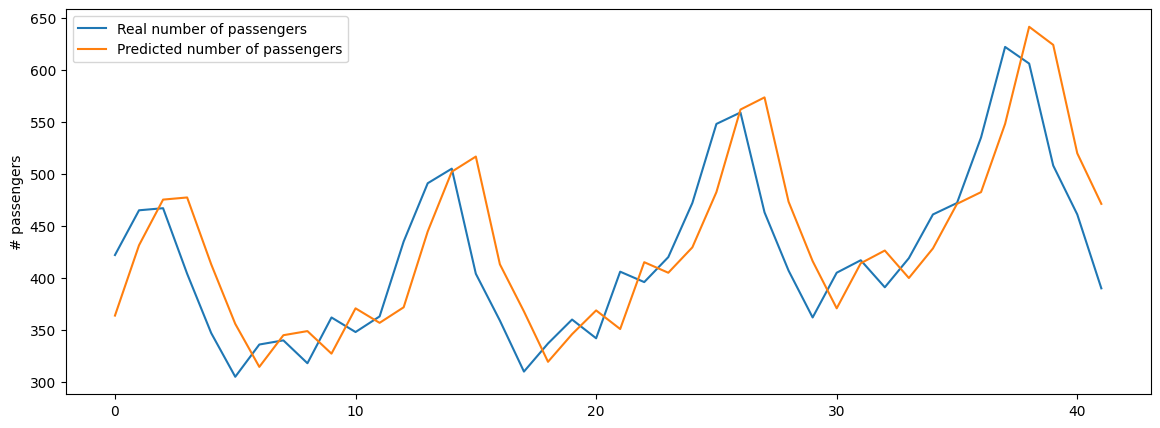

In [91]:
# Estimate model performance and plots
y_pred = model.predict(X_test)
y_prediction= y_pred.reshape(-1,1)
y_prediction = scaler.inverse_transform(y_prediction)
y_test_=y_test.reshape(-1,1)
y_test_ = scaler.inverse_transform(y_test_)
# plot baseline and predictions
plt.figure(figsize=(14,5))
plt.plot(y_test_, label = 'Real number of passengers')
plt.plot(y_prediction, label = 'Predicted number of passengers')
plt.ylabel('# passengers')
plt.legend()
plt.show()

RMSE: 51.76739764017701


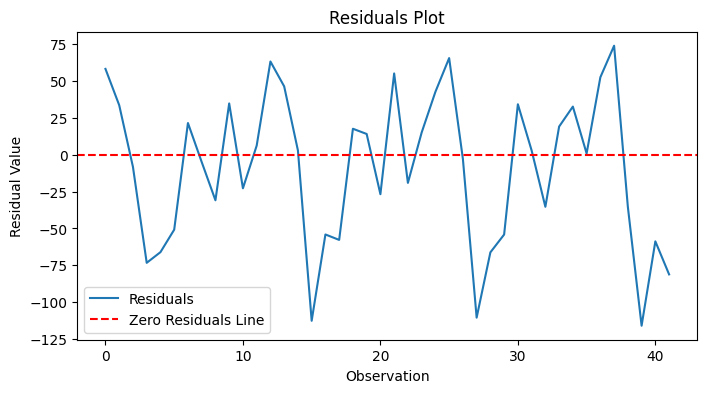

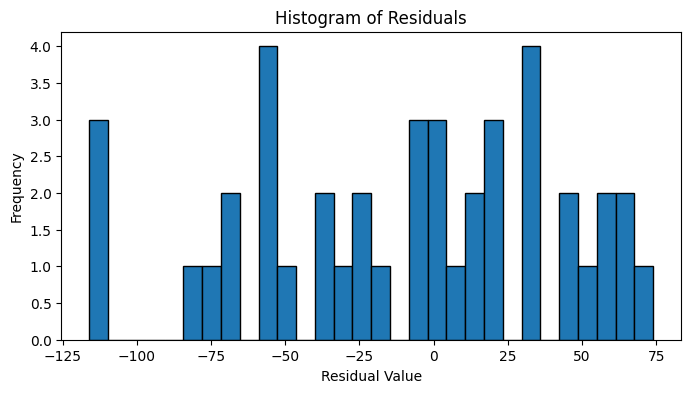

<Figure size 800x400 with 0 Axes>

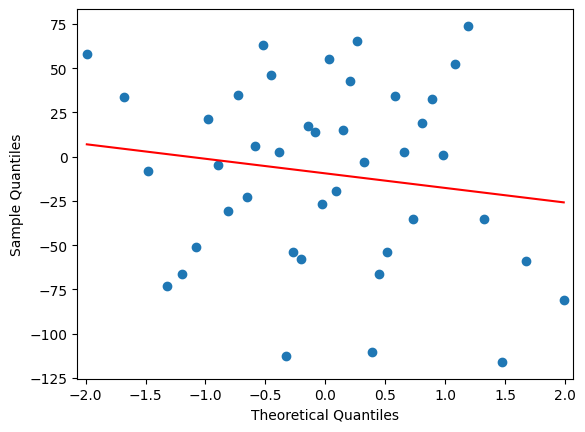

In [92]:
# Calcul du RMSE
rmse = np.sqrt(mean_squared_error(y_test_, y_prediction))
print('RMSE:', rmse)
# calcule des résidus
residuals = y_test_ - y_prediction
# Plotting residuals
plt.figure(figsize=(8, 4))
plt.plot(residuals, label='Residuals')
plt.axhline(y=0, color='r', linestyle='--', label='Zero Residuals Line')
plt.title('Residuals Plot')
plt.xlabel('Observation')
plt.ylabel('Residual Value')
plt.legend()
plt.show()
# Histogramme des résidus
plt.figure(figsize=(8, 4))
plt.hist(residuals, bins=30, edgecolor='black')
plt.title('Histogram of Residuals')
plt.xlabel('Residual Value')
plt.ylabel('Frequency')
plt.show()

from statsmodels.graphics.gofplots import qqplot
plt.figure(figsize=(8, 4))
qqplot(residuals, line='r')
plt.show()